# Importation des packages 

In [23]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
sns.set_style("white")

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header = None, sep = ",")
wine.columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", 
                "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", 
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
wine.head(5)

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Description des données 
## Représentation par catégorie

## La variable class
La variable catégorie

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='classe', ylabel='freq'>

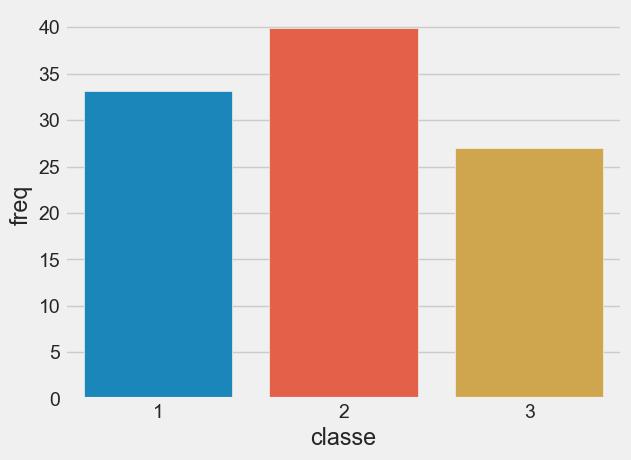

In [42]:
# En pourcentage
t = pd.crosstab(wine["class"], "freq", normalize=True)
t = t.assign(classe = t.index, freq = 100 * t.freq)
sns.barplot(x = "classe", y = "freq", data = t)

Lorsque nous avons une variable qui explique le nombre de classe, on peut représenter chaque variables quantitatives 

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

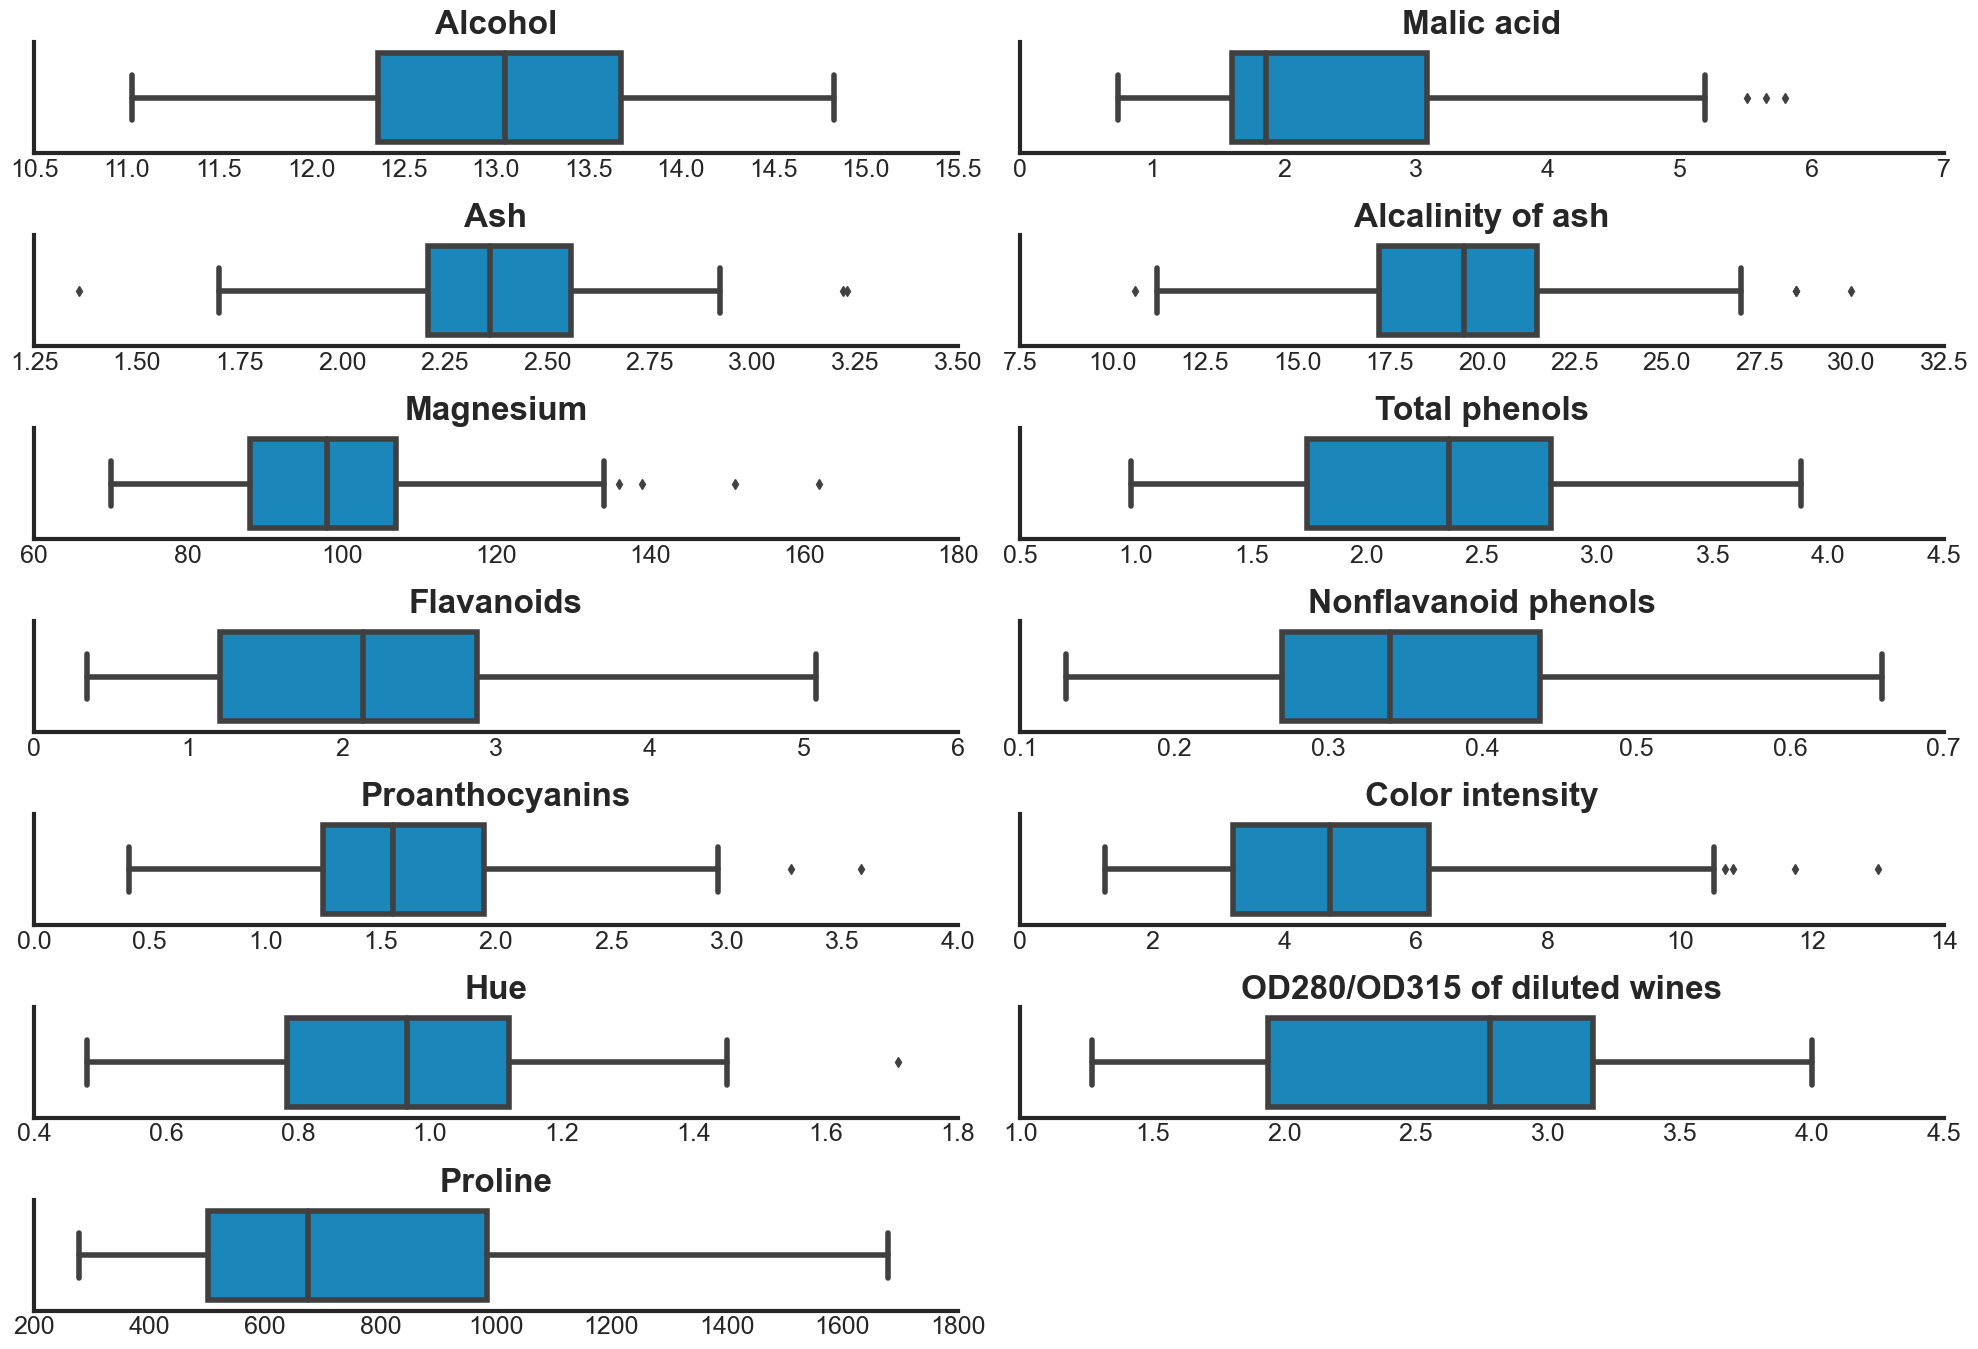

In [25]:
g = sns.catplot(x = "value", data = wine.melt(id_vars="class"), #class : c'est le nombre de la variable catégorique
                kind = "box", height = 2, aspect = 5,
                col = "variable", col_wrap = 2, sharex = False)
g.set_titles(col_template = "{col_name}", fontweight = "bold", size = 24)
g.set_xticklabels(size = 18)
g.tight_layout()
g.set_axis_labels(x_var = "")
plt.show()

Sinon, il faut séparer la variable class des variables quantitatives avec c :

In [12]:
wine2 = wine.drop("class", axis=1)
wine2.head(5)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Statistique descriptive sur les variables quantitatives
### Valeur manquantes, type, nombre de valeur différentes et dimension

In [13]:
data = pd.DataFrame()
data.index =  wine2.columns
data['count_NaN'] = wine2.isna().sum()
data['dtypes'] = wine2.dtypes
data['uniq'] = wine2.nunique()
data['repeat'] = wine2.shape[0] - data['uniq']
data['shape'] = wine2.shape[0]
data

,count_NaN,dtypes,uniq,repeat,shape
Alcohol,0,float64,126,52,178
Malic acid,0,float64,133,45,178
Ash,0,float64,79,99,178
Alcalinity of ash,0,float64,63,115,178
Magnesium,0,int64,53,125,178
Total phenols,0,float64,97,81,178
Flavanoids,0,float64,132,46,178
Nonflavanoid phenols,0,float64,39,139,178
Proanthocyanins,0,float64,101,77,178
Color intensity,0,float64,132,46,178


In [14]:
# Statistique describle
wine2.describe().T

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
Color intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

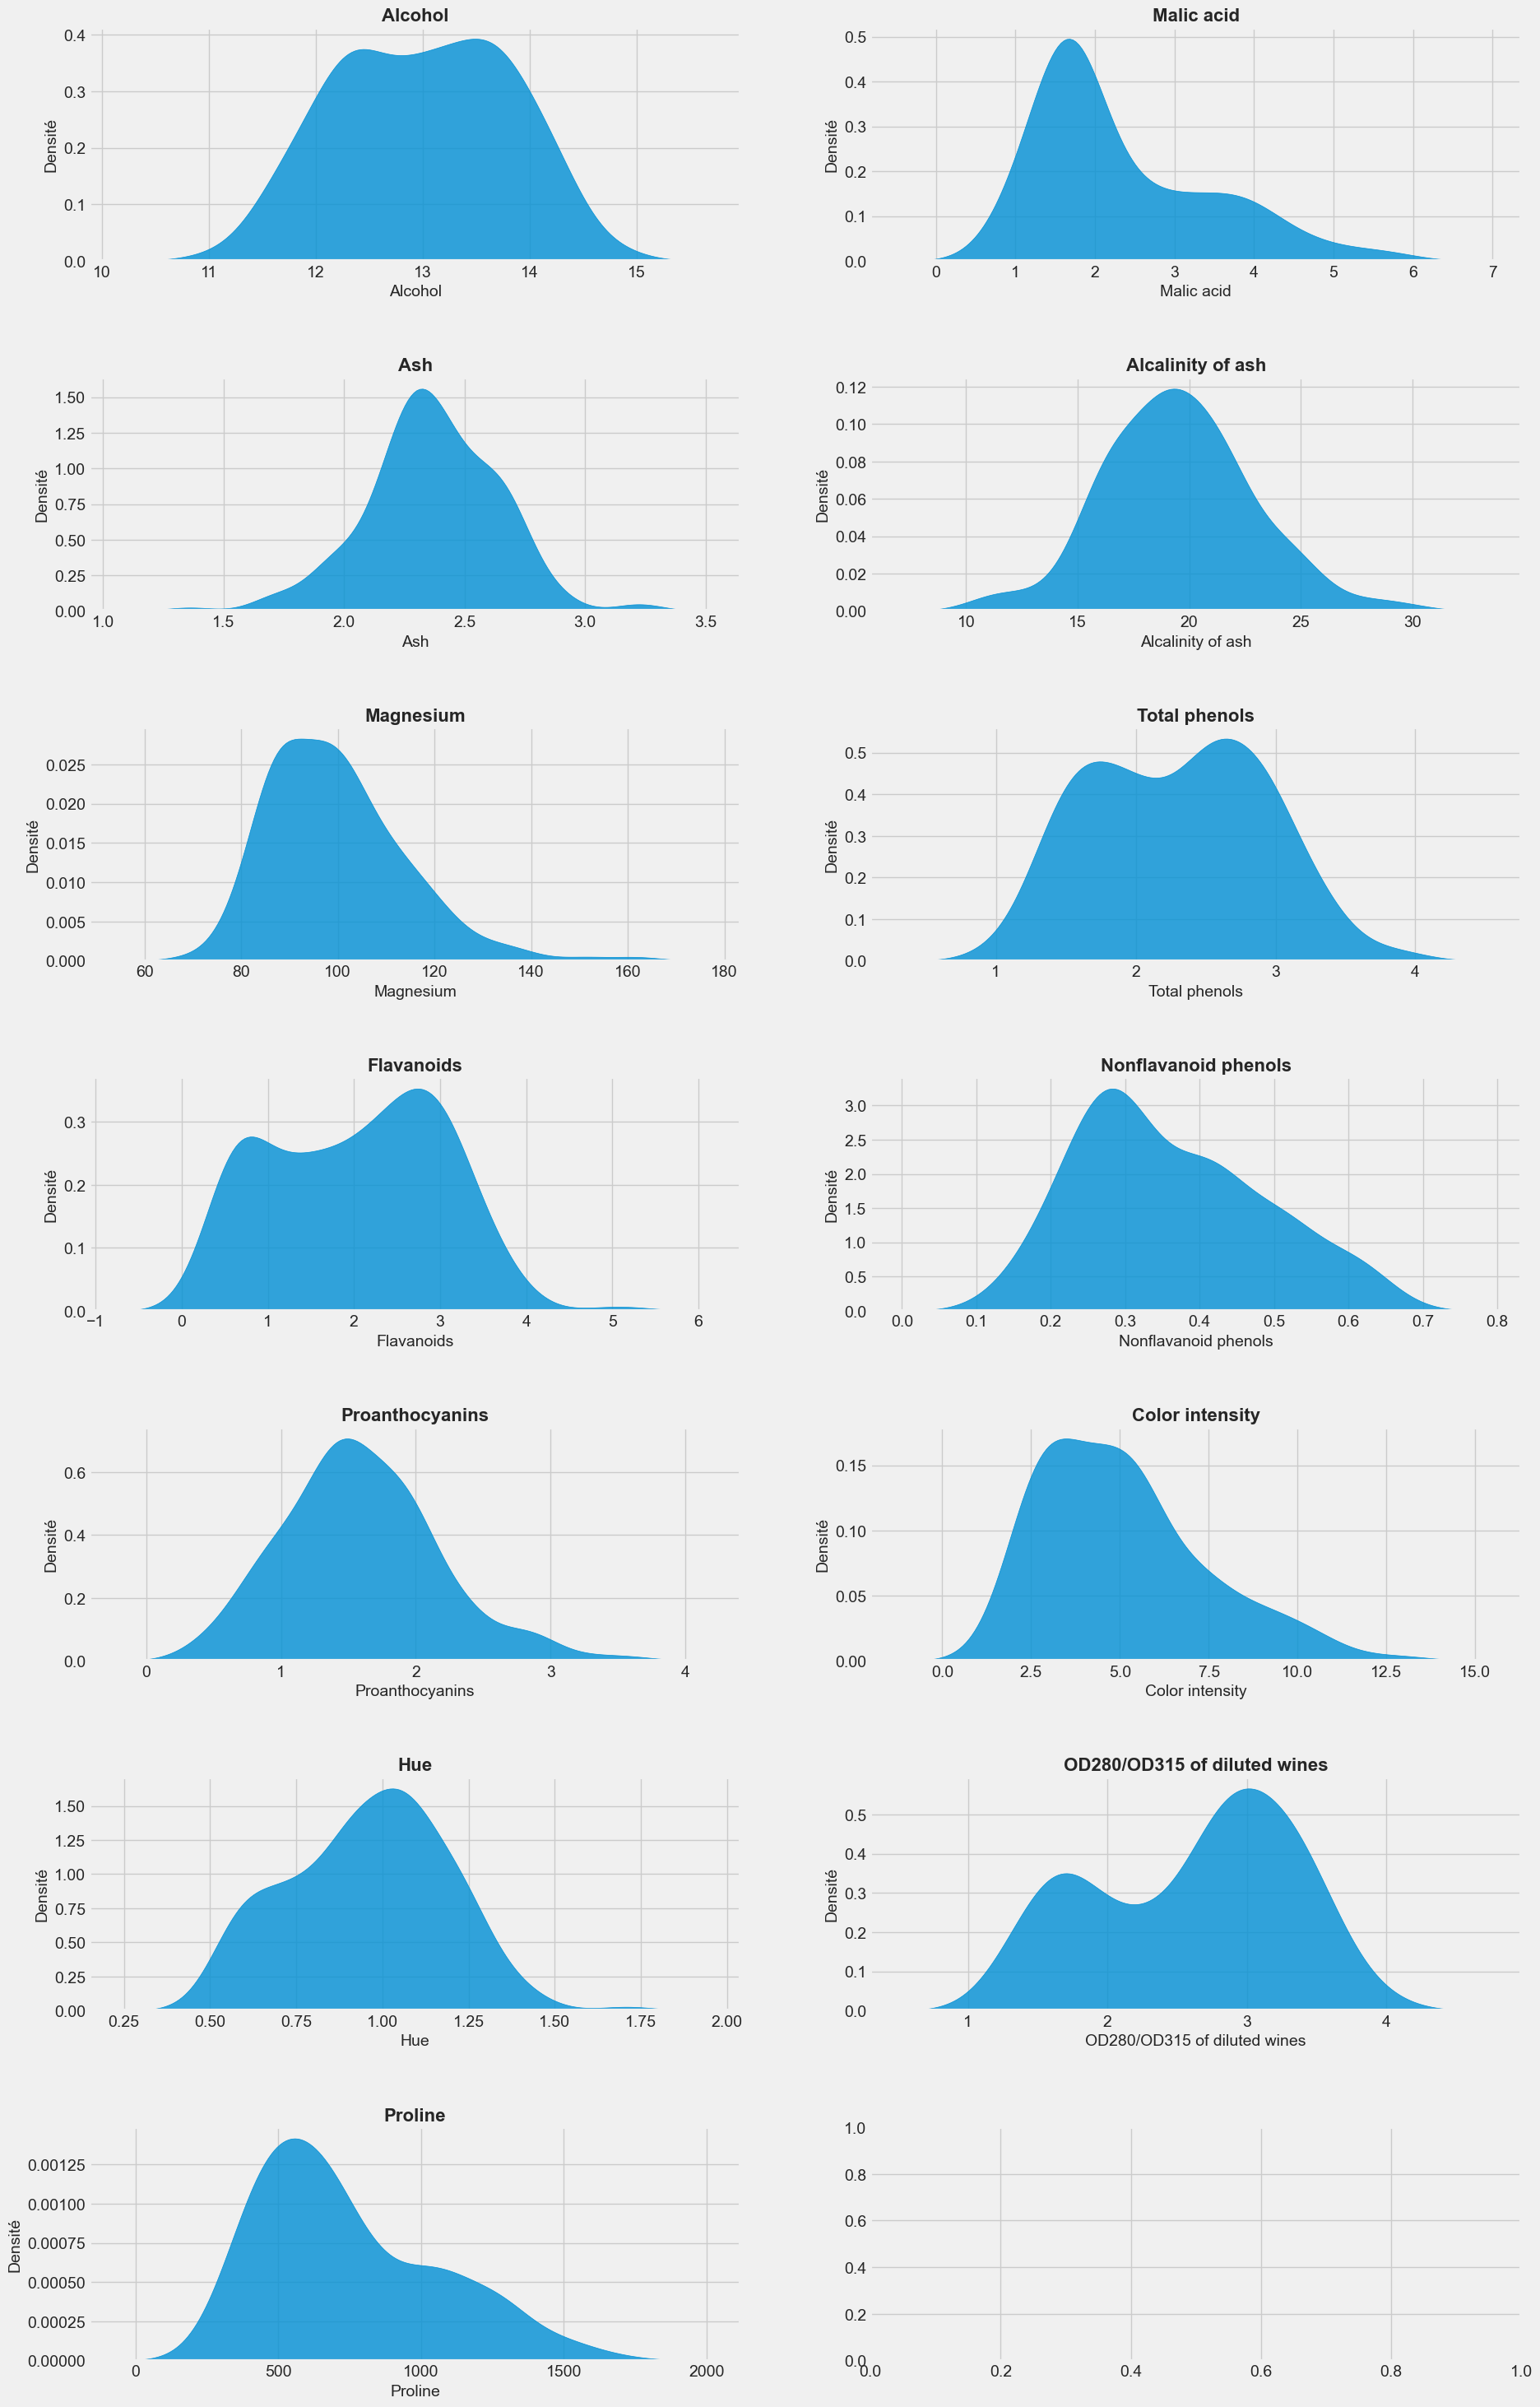

In [27]:
# Statistique univariée
plt.style.use('fivethirtyeight')
fig, axes = plt.subplots(7,2, figsize = (20,35))
plt.subplots_adjust(hspace=0.5)
columns = wine2.columns
for i, column in enumerate(columns):
    ax = axes[i // 2, i % 2]
    sns.kdeplot(data = wine2,
                x = column,
                fill = True,
                alpha = 0.8,
                ax = ax)
    
    ax.set_title(column, fontweight = 'bold', fontsize = 16)
    ax.set_xlabel(column, fontsize = 14)
    ax.set_ylabel('Densité', fontsize = 14)
plt.show()

array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

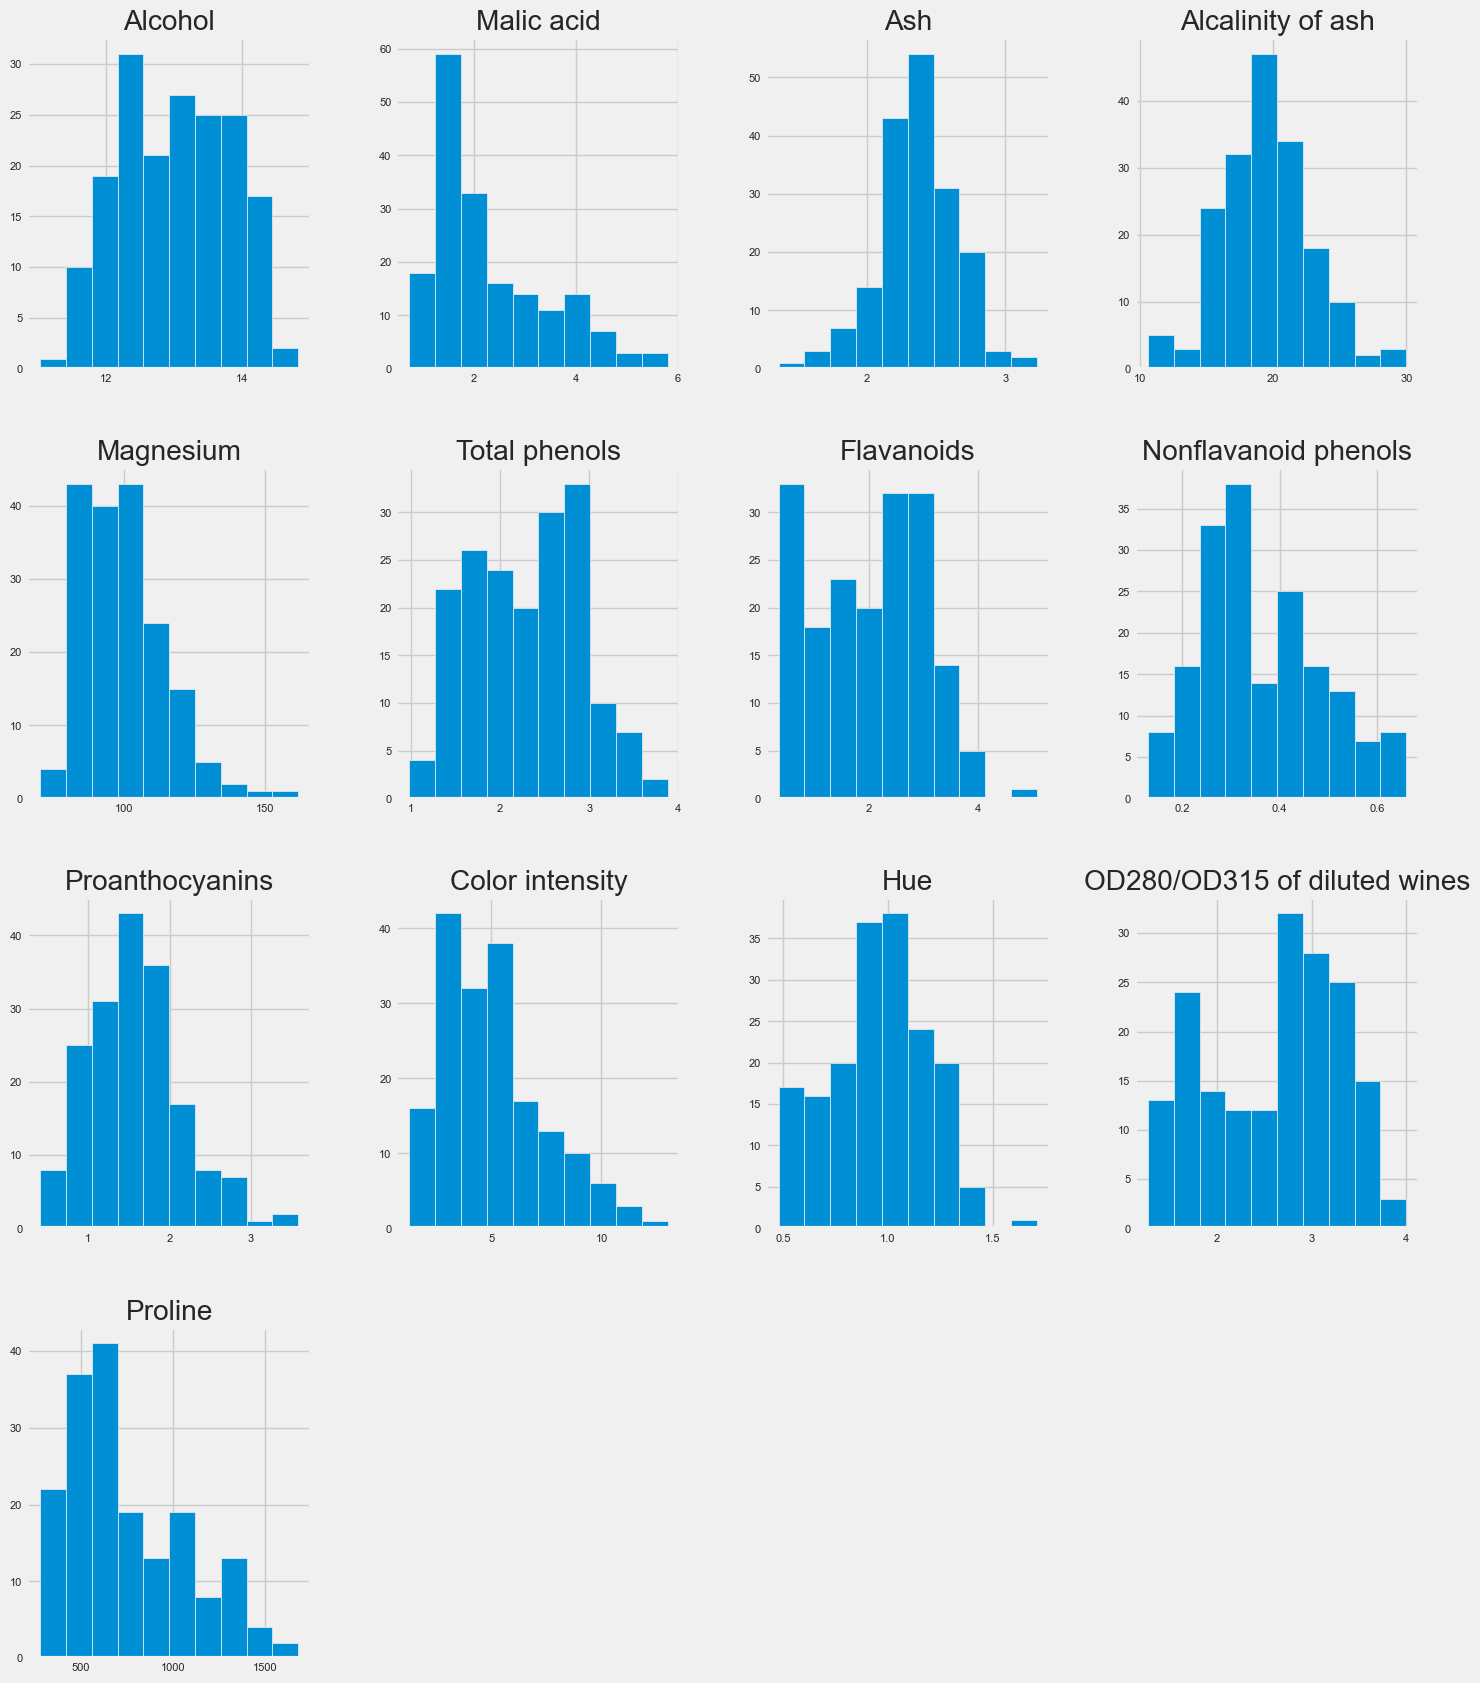

In [29]:
wine2.hist(figsize=(16, 20), bins=10, xlabelsize=8, ylabelsize=8)

c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Paqua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

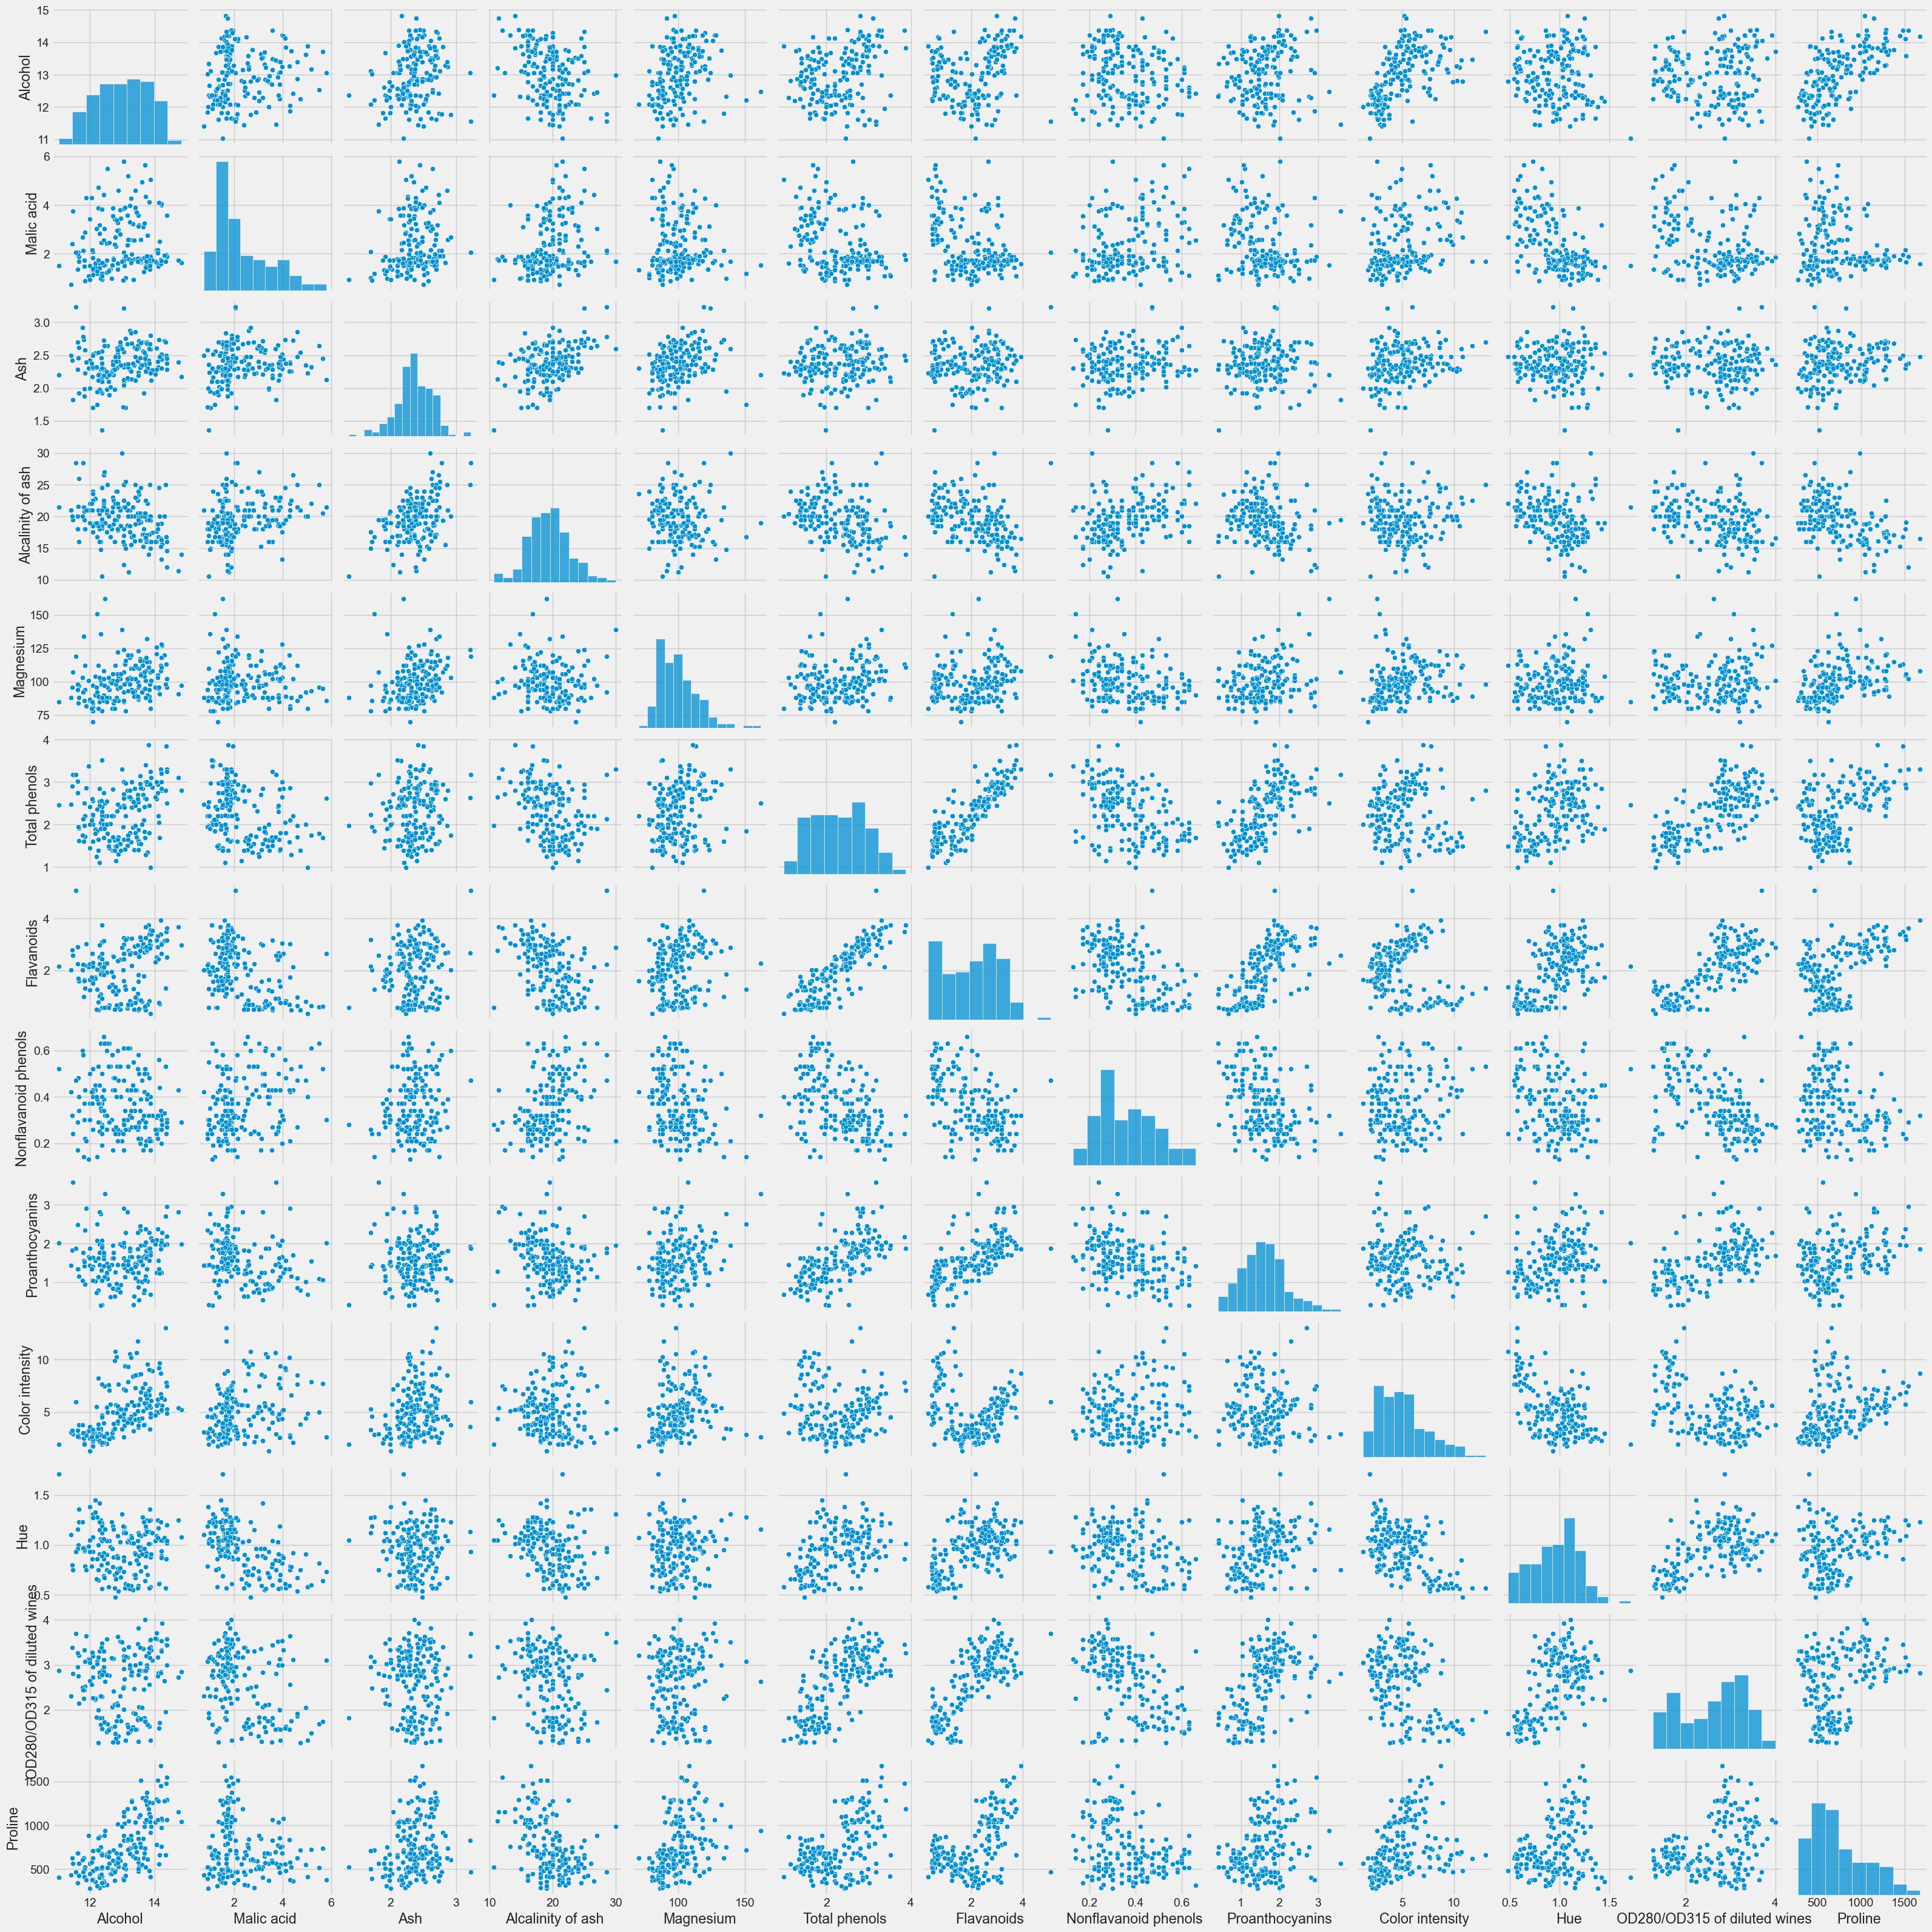

In [30]:
sns.pairplot(wine2)

# Analyse bivariée

<Axes: >

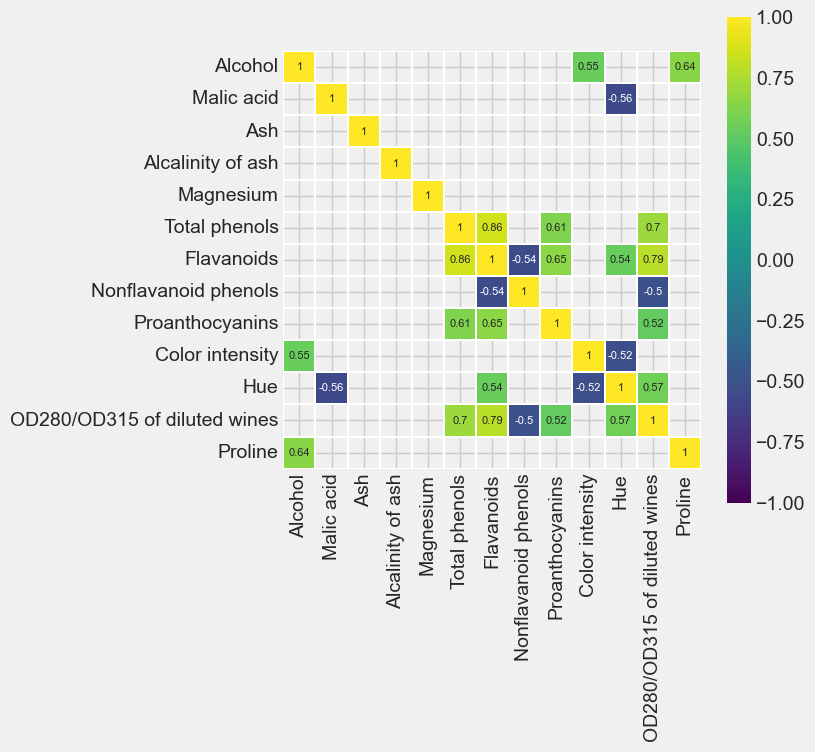

In [54]:
corr = wine2.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], #choisir soit même les seuil. ici ceux qui sont sup à 0.5 et ceux qui inf à -0.5 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

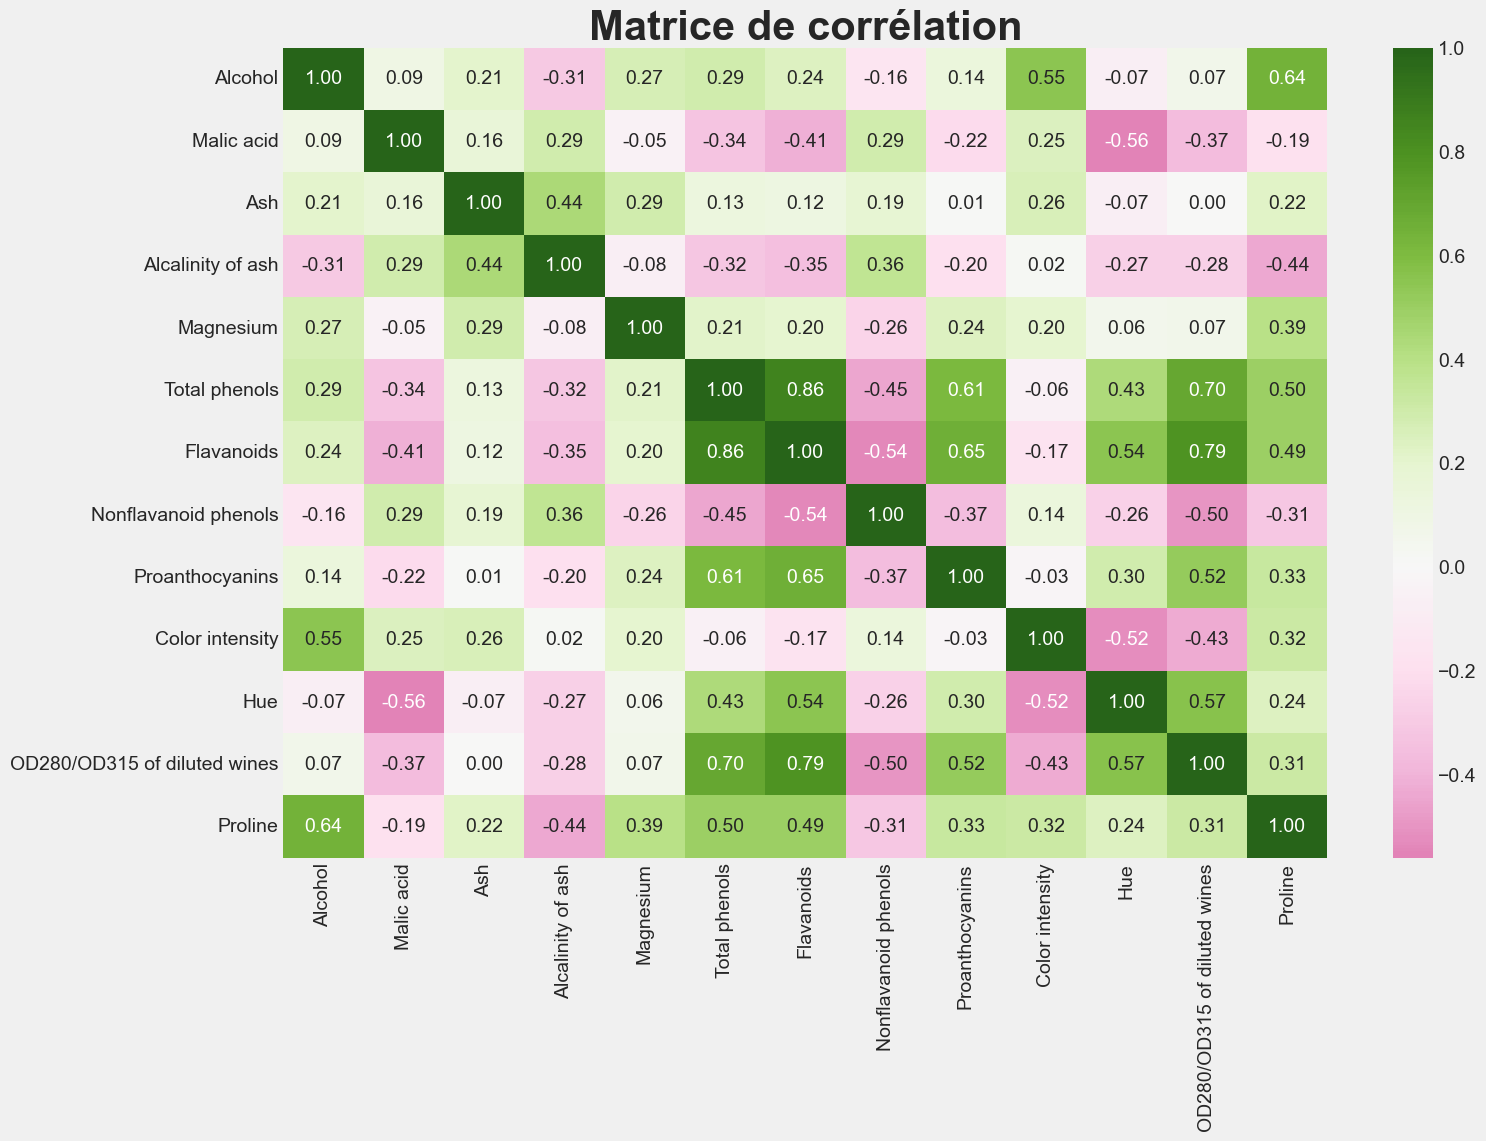

In [60]:
#Matrice de corrélation simple
fig = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True, fmt='.2f',  cmap = "PiYG", center = 0)
plt.title("Matrice de corrélation", fontsize = 30, fontweight = 'bold')
plt.show()